In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
def load_saved_array():
    myarrays = np.load('sess4_arr_2.npz') # load the training and test data from previously
    train_labels = myarrays['train_labels'] #make trainng labels
    test_labels = myarrays['test_labels'] #make test labels
    train_prep = myarrays['training_prep'] #make training prep array
    test_prep = myarrays['test_prep'] #make test prep array
    train_data = pd.read_pickle('sess4_df.pkl') #make train data dataframe
    return (train_prep,test_prep,train_labels,test_labels, train_data)

train_prep, test_prep,train_labels,test_labels,train_data = load_saved_array()

In [4]:
depth_ix, Corr_ix, L_ix, a_ix, b_ix = [
    list(train_data.columns).index(col)
    for col in ("Depth (mbsf)",  "Corr. Counts", "L*", "a*", "b*")]

In [5]:
L_train = train_prep[:100,L_ix].reshape(-1,1) # We reshape the index to make it a column index. Some algorithms in Scikit-learn take column vectors, some not. Annoying!
L_test = test_prep[:100,L_ix].reshape(-1,1)
train_labels = train_labels[:100] # This has only 1 column so no need for index
test_labels = test_labels[:100]

In [7]:
from sklearn.linear_model import SGDRegressor

# Let's define a new SGDRegressor with the following values for the hyperparameters:
# Maximum Number of Iterations (max_iter): 50
# Tolerance (tol): - infinity, i.e. we won't stop training based on tolerance
# Penalty: None
# Initial training rate: 0.1

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1)

# Now we train, or 'fit' our SGD:
sgd_reg.fit(L_train, train_labels)

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, tol=-inf)

In [9]:
porosity_predictions_SGD = sgd_reg.predict(L_test)
porosity_predictions_SGD

array([103.68646237,  37.21962502,  80.04816075,  34.38133432,
        26.67135064, 100.38218364,  99.72556416,  84.39032189,
        91.71904264,  84.30559679,  67.91129083,  61.74754014,
       103.43228708,  88.41476392,  61.36627721,  66.11088255,
        83.41598329, 101.67424135,  68.10192229,  92.82046888,
        64.90354994,  49.88602678,  88.6689392 ,  85.13166647,
        57.34183518,  29.12837841,  83.6489773 ,  95.48930939,
        98.81476938,  72.33817707,  53.35975569,  67.91129083,
       109.25713739,  83.47952711,  91.5072299 ,  43.89172628,
        39.21066476,  79.45508508,  80.30233603,  97.96751843,
        80.59887387,  94.81150862,  96.40010416,  56.74875951,
        88.37240137,  92.03676175,  85.68237959,  83.7337024 ,
        51.96179162, 103.68646237,  56.74875951,  98.45468772,
       113.55693598,  84.94103501,  78.86200941,  81.53084992,
        39.3377524 ,  77.97239591,  71.59683248,  84.2208717 ,
       107.03310363,  88.56303284,  89.53737143,  82.92

In [13]:
x_sgd_reg = np.linspace(0,1,10).reshape(-1,1) # again need to reshape

# That was our x values. Now we create the y values by 'predicting' them using our fitted linear model:
y_sgd_reg = sgd_reg.predict(x_sgd_reg)

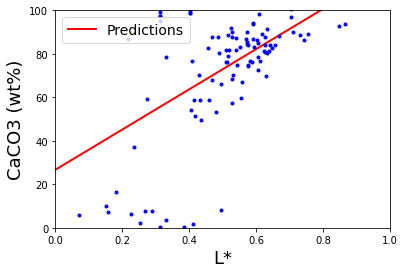

In [14]:

plt.plot(x_sgd_reg, y_sgd_reg, "r-", linewidth=2, label="Predictions")
plt.plot(L_train, train_labels, "b.")
plt.xlabel("L*", fontsize=18)
plt.ylabel("CaCO3 (wt%)", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 1, 0, 100])
plt.show()

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([26.67135064]), array([92.54098546]))

In [15]:
carbonate_predictions = sgd_reg.predict(L_test)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# we input the true values (test_labels) and predicted values (porosity_prediction) to calculate the MSE and derive the RSME
lin_mse = mean_squared_error(test_labels, carbonate_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(test_labels, carbonate_predictions)


print(f'Root mean squared error is {lin_rmse}')
print(f'Mean absolute error is {lin_mae}')

Root mean squared error is 26.52424206608535
Mean absolute error is 20.9618802486455


Again A poor performance of the Gradient Descent Method